# 🚀 **Welcome to Notebook 2.1: Diving Deep into Tokenization** 🌊

📚 **Previous Adventure**:  
In our last notebook, we dipped our toes into tokenization with `tiktoken` and built our first dataset. Now, we’re strapping on our scuba gear to **explore the ocean of tokenization** — where every byte, subword, and special character hides secrets!  

## 🧩 **What is Tokenization? Breaking the Code** 🔍  

**Tokenization** is like chopping a 🍎 *sentence* into bite-sized 🍣 *pieces* (tokens!). These tokens can be:  
- **Words** ("hello")  
- **Subwords** ("un+break+able")  
- **Characters** ("h", "e", "l", "l", "o")  
- **Special symbols** ("<|EOS|>")  

**Why does this matter?**  
```python
# Without tokenization, models see this:
"Th!s 1s gibrish_2_LLMs"
# With tokenization:
["Th", "!s", " 1", "s", " gib", "rish", "_2", "_LLMs"]
```

## 🌟 **Why Tokenization Rules NLP** 👑

### 📌 **4 Reasons Tokenization is ESSENTIAL**  
1. **🔢 Text → Numbers**:  
   *"Hello"* → `[15496, 23]` (models speak math, not poetry!)  

2. **🛠️ Vocabulary Control**:  
   Slash 100k+ word chaos into reusable subword Lego bricks 🧱.  

3. **⚡ Turbo Efficiency**:  
   Smaller token sets = Faster training + Smarter models 🚄.  

4. **🎯 Context Mastery**:  
   Tokens preserve meaning like a puzzle — `"bank"` (💰 river) vs. `"bank"` (🏦 financial).  

## 💥 **Tokenization Gone Wrong: A Horror Story** 👻  

**Example: The Math Meltdown**  
```diff
+ GOOD TOKENIZER:
  "2 + 2 = 4" → ["2", "+", "2", "=", "4"] → Model thinks: 4 ✅

- BAD TOKENIZER:
  "2 + 2 = 4" → ["2+", "2=", "4"] → Model outputs: "5" 😱
```

**Why care?**  
A single tokenization error can turn GPT-4 into a 🧟 *math zombie*!  

---

**🔥 Ready to become a Tokenization Titan? Let’s dive in!** 🏊♂️  

```diff
+ PRO TIP: Keep this notebook handy — tokenization skills are the skeleton key to NLP mastery! 🔑
```

In [50]:
# Lets load some data to work with
import os
import urllib.request

if not os.path.exists("the-verdict.txt"):
    url = ("https://raw.githubusercontent.com/rasbt/"
           "LLMs-from-scratch/main/ch02/01_main-chapter-code/"
           "the-verdict.txt")
    file_path = "the-verdict.txt"
    urllib.request.urlretrieve(url, file_path)

In [49]:
with open("the-verdict.txt", "r") as f:
    text = f.read() 

print(f"the length of th text : {len(text)})")
print(f"first 1000 chars:{text[:1000]})")
      

the length of th text : 20479)
first 1000 chars:I HAD always thought Jack Gisburn rather a cheap genius--though a good fellow enough--so it was no great surprise to me to hear that, in the height of his glory, he had dropped his painting, married a rich widow, and established himself in a villa on the Riviera. (Though I rather thought it would have been Rome or Florence.)

"The height of his glory"--that was what the women called it. I can hear Mrs. Gideon Thwing--his last Chicago sitter--deploring his unaccountable abdication. "Of course it's going to send the value of my picture 'way up; but I don't think of that, Mr. Rickham--the loss to Arrt is all I think of." The word, on Mrs. Thwing's lips, multiplied its _rs_ as though they were reflected in an endless vista of mirrors. And it was not only the Mrs. Thwings who mourned. Had not the exquisite Hermia Croft, at the last Grafton Gallery show, stopped me before Gisburn's "Moon-dancers" to say, with tears in her eyes: "We shall not lo

As we did in the previous notebook we take a look at the all the unique characters

In [3]:
chars  = sorted(list(set(text)))
vocab_size = len(chars)
print(f"Number of unique characters: {vocab_size}")
print(chars)    
for i, char in enumerate(chars):
    print(f"{i} -> {char}")
    

Number of unique characters: 62
['\n', ' ', '!', '"', "'", '(', ')', ',', '-', '.', ':', ';', '?', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'L', 'M', 'N', 'O', 'P', 'R', 'S', 'T', 'U', 'V', 'W', 'Y', '_', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
0 -> 

1 ->  
2 -> !
3 -> "
4 -> '
5 -> (
6 -> )
7 -> ,
8 -> -
9 -> .
10 -> :
11 -> ;
12 -> ?
13 -> A
14 -> B
15 -> C
16 -> D
17 -> E
18 -> F
19 -> G
20 -> H
21 -> I
22 -> J
23 -> L
24 -> M
25 -> N
26 -> O
27 -> P
28 -> R
29 -> S
30 -> T
31 -> U
32 -> V
33 -> W
34 -> Y
35 -> _
36 -> a
37 -> b
38 -> c
39 -> d
40 -> e
41 -> f
42 -> g
43 -> h
44 -> i
45 -> j
46 -> k
47 -> l
48 -> m
49 -> n
50 -> o
51 -> p
52 -> q
53 -> r
54 -> s
55 -> t
56 -> u
57 -> v
58 -> w
59 -> x
60 -> y
61 -> z


A very vasic tokenizer is built with a simple mapping between the char and thier int as you see below

In [4]:
char_to_int = {ch:i for i,ch in enumerate(chars)}
int_to_char = {i:ch for i,ch in enumerate(chars)}

encode = lambda s:[char_to_int[c] for c in s]
decode = lambda x:"".join([int_to_char[i] for i in x])


print(f"Encoded: {encode('hello')}")
print(f"Decoded: {decode(encode('hello'))}")


Encoded: [43, 40, 47, 47, 50]
Decoded: hello


We create an **embedding lookup table** where each token (represented by an integer index) maps to a dense vector of size `embedding_dim`. 

For example:
- Token `0` → Vector of shape `(10,)`
- Token `1` → Vector of shape `(10,)`
- ...
- Token `vocab_size-1` → Vector of shape `(10,)`

The `nn.Embedding` layer acts like a dictionary:  
`Input: token index (int)` → `Output: corresponding vector (torch.Tensor)`

In [51]:
import torch
import torch.nn as nn

vocab_size = 1000  # Define vocabulary size
embedding_dim = 10

# Create embedding table
embedding_table = nn.Embedding(vocab_size, embedding_dim)

# Shape: (num_embeddings, embedding_dim)
print(embedding_table.weight.shape)  # Output: torch.Size([1000, 10])

torch.Size([1000, 10])


Lets visulize this for better understanding 

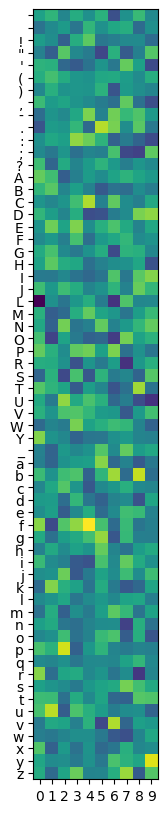

In [52]:
# lets visualize the embedding table
import matplotlib.pyplot as plt
import numpy as np

def plot_embedding_table(embedding_table, int_to_char):
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    ax.imshow(embedding_table.weight.detach().numpy(), cmap='viridis')
    ax.set_yticks(list(int_to_char.keys()))
    ax.set_yticklabels(list(int_to_char.values()))
    ax.set_xticks(list(range(embedding_table.weight.shape[1])))
    ax.set_xticklabels(list(range(embedding_table.weight.shape[1])))
    plt.show()

plot_embedding_table(embesdding_table, int_to_char)

### **UTF-8 & Text Encoding Fundamentals** 🔤

**What is UTF-8?**  
UTF-8 (Unicode Transformation Format - 8-bit) is the dominant character encoding standard that:
- Represents **every Unicode character** (supports 1.1M+ symbols)
- Uses **1-4 bytes per character** (dynamic width)
- Backward-compatible with ASCII (first 128 characters match)

**Why UTF-8 for Tokenization?**  
Modern tokenizers use UTF-8 encoding to:
1. Handle **multi-language text** seamlessly
2. Process **special characters** (emojis, symbols, etc.)
3. Create consistent byte-level representations before tokenization


This byte representation becomes the foundation for tokenization algorithms like BPE (Byte-Pair Encoding) used in modern LLMs.

In [20]:
# lets use sample text with an emoji
sampel_text = "Hi world 🌍, how are you? 😊"

# using encoding UTF-8
encoded_text = sampel_text.encode("utf-8")
print(f"Encoded text raw: {encoded_text}")
print(f"Encoded text: {list(encoded_text)}")


Encoded text raw: b'Hi world \xf0\x9f\x8c\x8d, how are you? \xf0\x9f\x98\x8a'
Encoded text: [72, 105, 32, 119, 111, 114, 108, 100, 32, 240, 159, 140, 141, 44, 32, 104, 111, 119, 32, 97, 114, 101, 32, 121, 111, 117, 63, 32, 240, 159, 152, 138]


Here's why UTF-8 is preferred over UTF-16/32 for text processing and tokenization in modern NLP:

---

### **1. Space Efficiency** 💾
| Encoding | ASCII (1 byte) | Common Latin (2 bytes) | Emojis/Special (4 bytes) |
|----------|----------------|------------------------|--------------------------|
| UTF-8    | 1 byte         | 2 bytes                | 4 bytes                  |
| UTF-16   | 2 bytes        | 2 bytes                | 4 bytes                  |
| UTF-32   | 4 bytes        | 4 bytes                | 4 bytes                  |

**Example with your text**:
```python
text = "Hi world 🌍, how are you? 😊"

# Byte counts:
UTF-8  → 25 bytes  
UTF-16 → 46 bytes  (+84% larger)
UTF-32 → 92 bytes  (+268% larger)
```

---

### **2. Compatibility & Adoption** 🌐
- **UTF-8**:
  - Backward compatible with ASCII
  - Used by 98% of web pages ([W3Techs](https://w3techs.com/technologies/overview/character_encoding))
  - Default encoding in Python/Linux/Modern APIs

- **UTF-16/32**:
  - Requires byte-order mark (BOM) for endianness
  - Mainly used in legacy systems (Windows APIs, Java)

---

### **3. Tokenization Advantages** 🔠
Modern tokenizers (BERT, GPT, etc.) use **byte-level operations**:
```python
# UTF-8 allows cleaner byte-to-token mapping
text = "🌍"
utf8_bytes = [240, 159, 140, 141]  # Clear 4-byte emoji
utf16_bytes = [255, 254, 61, 216, 13, 220]  # BOM + surrogate pairs
```

**Why this matters**:
- BPE (Byte-Pair Encoding) works directly with UTF-8 bytes
- Fixed 4-byte UTF-32 wastes space for common characters
- UTF-16's surrogate pairs complicate token merging

---

### **4. Real-World Impact** 🚀
| Scenario               | UTF-8 Advantage                                |
|------------------------|-----------------------------------------------|
| Model Training          | Smaller datasets → Faster training            |
| API Payloads            | Reduced bandwidth usage                       |
| Multilingual Support    | Efficient mixing of Latin/Non-Latin scripts   |
| Emoji Handling          | Consistent 4-byte representation              |

---

### **When to Use UTF-16/32?**
- **UTF-16**: Memory-constrained Asian language apps (fixed 2 bytes per common Hanzi)
- **UTF-32**: Rare text processing requiring O(1) character indexing

For 99% of NLP use cases, **UTF-8 is the optimal choice** for balancing efficiency, compatibility, and modern tokenization needs.

In [21]:
# why no using UTF-16 or UTF-32
encoded_text = sampel_text.encode("utf-16")
print(f"Encoded text in raw bytes: {list(encoded_text)}")

encoded_text = sampel_text.encode("utf-32")
print(f"Encoded text in raw bytes: {list(encoded_text)}")


Encoded text in raw bytes: [255, 254, 72, 0, 105, 0, 32, 0, 119, 0, 111, 0, 114, 0, 108, 0, 100, 0, 32, 0, 60, 216, 13, 223, 44, 0, 32, 0, 104, 0, 111, 0, 119, 0, 32, 0, 97, 0, 114, 0, 101, 0, 32, 0, 121, 0, 111, 0, 117, 0, 63, 0, 32, 0, 61, 216, 10, 222]
Encoded text in raw bytes: [255, 254, 0, 0, 72, 0, 0, 0, 105, 0, 0, 0, 32, 0, 0, 0, 119, 0, 0, 0, 111, 0, 0, 0, 114, 0, 0, 0, 108, 0, 0, 0, 100, 0, 0, 0, 32, 0, 0, 0, 13, 243, 1, 0, 44, 0, 0, 0, 32, 0, 0, 0, 104, 0, 0, 0, 111, 0, 0, 0, 119, 0, 0, 0, 32, 0, 0, 0, 97, 0, 0, 0, 114, 0, 0, 0, 101, 0, 0, 0, 32, 0, 0, 0, 121, 0, 0, 0, 111, 0, 0, 0, 117, 0, 0, 0, 63, 0, 0, 0, 32, 0, 0, 0, 10, 246, 1, 0]


In [9]:
longer_text =  """
Hello, world! 🌎 I hope you're all doing fantastic today. 🌟 Life is full of surprises, and every day is a new opportunity to grow, learn, and smile. 😊  
Take a deep breath, step outside, and enjoy the little things 🌸—like the sound of birds chirping 🐦, the warmth of the sun ☀️, or even a good cup of coffee ☕.  

Remember, challenges are just opportunities in disguise. 💪 So keep pushing forward, believe in yourself, and never stop dreaming. 🌈  
Oh, and don’t forget to share kindness and spread positivity wherever you go. ❤️  
Have an amazing day ahead! 🚀
"""
# using encoding UTF-8 to get the raw bytes stream
tokens = longer_text.encode("utf-8")
tokens=list(map(int , tokens))
print("_________________________")
print(longer_text)
print("length of the text: ", len(longer_text))
print("_________________________")
print("Encoded text: ", tokens)
print("length of the encoded text: ", len(tokens))


_________________________

Hello, world! 🌎 I hope you're all doing fantastic today. 🌟 Life is full of surprises, and every day is a new opportunity to grow, learn, and smile. 😊  
Take a deep breath, step outside, and enjoy the little things 🌸—like the sound of birds chirping 🐦, the warmth of the sun ☀️, or even a good cup of coffee ☕.  

Remember, challenges are just opportunities in disguise. 💪 So keep pushing forward, believe in yourself, and never stop dreaming. 🌈  
Oh, and don’t forget to share kindness and spread positivity wherever you go. ❤️  
Have an amazing day ahead! 🚀

length of the text:  560
_________________________
Encoded text:  [10, 72, 101, 108, 108, 111, 44, 32, 119, 111, 114, 108, 100, 33, 32, 240, 159, 140, 142, 32, 73, 32, 104, 111, 112, 101, 32, 121, 111, 117, 39, 114, 101, 32, 97, 108, 108, 32, 100, 111, 105, 110, 103, 32, 102, 97, 110, 116, 97, 115, 116, 105, 99, 32, 116, 111, 100, 97, 121, 46, 32, 240, 159, 140, 159, 32, 76, 105, 102, 101, 32, 105, 115, 32, 10

# Byte-Pair Encoding (BPE) Explained Concisely 🧩

## **What is BPE?**  
A *subword tokenization* algorithm that merges frequent character pairs to create reusable units, balancing word-level meaning and character-level flexibility.

## **How BPE Works** (Visual Walkthrough)

### **1. Training Corpus**  
`["low", "lower", "newest", "newer"]`

### **2. Step-by-Step Process**  
**Initial Split** → Characters:  
`l o w | l o w e r | n e w e s t | n e w e r`

**Merge Most Frequent Pairs**:  
1️⃣ `l` + `o` → **`lo`** (2x)  
   → `lo w | lo w e r | n e w e s t | n e w e r`  
2️⃣ `lo` + `w` → **`low`** (2x)  
   → `low | low e r | n e w e s t | n e w e r`  
3️⃣ `e` + `r` → **`er`** (2x)  
   → `low | lower | n e w e s t | newer`

### **3. Final Tokens**  
`["low", "er", "n", "e", "w", "es", "t"]`

Here's a **concise technical blueprint** for building a BPE tokenizer:

---

### **1. Core Components**  
1. **Frequency Analyzer**  
   - *Goal*: Identify most common adjacent token pairs in a corpus  
   - *Method*: Sliding window scan + hashmap counting  
   - *Key*: Optimized for large datasets (stream processing)  

2. **Pair Merger**  
   - *Goal*: Replace frequent pairs with new unified tokens  
   - *Method*: Iterative replacement + vocabulary expansion  
   - *Key*: Preserve merge order for consistent encoding  

3. **Encoder**  
   - *Pipeline*: Text → UTF-8 bytes → apply merges → token IDs  
   - *Optimization*: O(1) pair lookups via precomputed merge rules  

4. **Decoder**  
   - *Pipeline*: Token IDs → byte sequences → UTF-8 text  
   - *Edge Handling*: Graceful unknown token fallback  

5. **Tokenizer Class**  
   - *State*: `merges`, `vocab`, `next_id`  
   - *Methods*: `train()`, `encode()`, `decode()`  


In [27]:
def most_common_pairs(ids):
    """Counts consecutive ID pairs in a token sequence.
    
    Args:
        ids: List of token IDs representing encoded text
        
    Returns:
        Dictionary with (id1, id2) pairs as keys and counts as values
    """
    counts = {}
    # Iterate through consecutive pairs using zip:
    # zip(ids, ids[1:]) creates pairs like (ids[0], ids[1]), (ids[1], ids[2]), etc.
    for pair in zip(ids, ids[1:]):
        # Get current count or default to 0, then increment
        counts[pair] = counts.get(pair, 0) + 1
    return counts

# Example usage with token IDs (pretend these are byte values)
tokens = [1, 2, 2, 3, 2, 2, 3]  # Sample token sequence
counts = most_common_pairs(tokens)

print(f"Number of unique pairs: {len(counts)}")
# Output: Number of unique pairs: 3

# Sort pairs by frequency descending using:
# - Generator expression to iterate through dict items
# - sorted() with reverse=True for descending order
sorted_counts = sorted(((k,v) for k,v in counts.items()), key=lambda x: -x[1])
print(sorted_counts)
# Output: [((2, 2), 2), ((2, 3), 2), ((1, 2), 1), ((3, 2), 1)]

Number of unique pairs: 4
[((2, 2), 2), ((2, 3), 2), ((1, 2), 1), ((3, 2), 1)]


We can see what pair with the most appreance

In [28]:
top_pair = max(counts, key=counts.get)
top_pair

(2, 2)

The second step is to implemet a funtion that merge the pair we selected in the previuos function

In [29]:
def merge(ids, pair, idx):
    """
    Replaces all occurrences of a specified pair in a token sequence with a new index.
    
    Args:
        ids (list): List of token IDs to process
        pair (tuple): Pair of consecutive token IDs to replace (left, right)
        idx (int): New token ID to substitute for the pair
    
    Returns:
        list: New list of token IDs with replacements applied
    """
    new_ids = []  # Initialize list to store merged tokens
    i = 0  # Index pointer for original ids list
    
    # Iterate through the token sequence
    while i < len(ids):
        # Check if we can look ahead and find the target pair
        if i < len(ids) - 1 and (ids[i], ids[i+1]) == pair:
            # Replace pair with new index
            new_ids.append(idx)
            # Skip over the second element of the pair
            i += 2
        else:
            # Keep original token if no pair found
            new_ids.append(ids[i])
            i += 1
            
    return new_ids

# Example usage
ids = [1, 2, 3, 4, 2, 3, 5]  # Original token sequence
pair = (2, 3)  # Pair to find and replace
idx = 9  # Replacement token ID

result = merge(ids, pair, idx)
print(f"Original: {ids}")
print(f"After merging {pair} → {idx}: {result}")

Original: [1, 2, 3, 4, 2, 3, 5]
After merging (2, 3) → 9: [1, 9, 4, 9, 5]


In [30]:
tokens2 = merge(tokens, top_pair, 256)
print("length of the new tokens: ", len(tokens2))
print("length of the original tokens: ", len(tokens))

length of the new tokens:  5
length of the original tokens:  7


Lets try woking with larger text corpus

In [31]:
encoded_text2 = text.encode("utf-8")
full_tokens = list(map(int, encoded_text2))


In [32]:
# making the training text longer to have more representative token statistics
# text from https://www.reedbeta.com/blog/programmers-intro-to-unicode/
text = """A Programmer’s Introduction to Unicode March 3, 2017 · Coding · 22 Comments  Ｕｎｉｃｏｄｅ! 🅤🅝🅘🅒🅞🅓🅔‽ 🇺\u200c🇳\u200c🇮\u200c🇨\u200c🇴\u200c🇩\u200c🇪! 😄 The very name strikes fear and awe into the hearts of programmers worldwide. We all know we ought to “support Unicode” in our software (whatever that means—like using wchar_t for all the strings, right?). But Unicode can be abstruse, and diving into the thousand-page Unicode Standard plus its dozens of supplementary annexes, reports, and notes can be more than a little intimidating. I don’t blame programmers for still finding the whole thing mysterious, even 30 years after Unicode’s inception.  A few months ago, I got interested in Unicode and decided to spend some time learning more about it in detail. In this article, I’ll give an introduction to it from a programmer’s point of view.  I’m going to focus on the character set and what’s involved in working with strings and files of Unicode text. However, in this article I’m not going to talk about fonts, text layout/shaping/rendering, or localization in detail—those are separate issues, beyond my scope (and knowledge) here.  Diversity and Inherent Complexity The Unicode Codespace Codespace Allocation Scripts Usage Frequency Encodings UTF-8 UTF-16 Combining Marks Canonical Equivalence Normalization Forms Grapheme Clusters And More… Diversity and Inherent Complexity As soon as you start to study Unicode, it becomes clear that it represents a large jump in complexity over character sets like ASCII that you may be more familiar with. It’s not just that Unicode contains a much larger number of characters, although that’s part of it. Unicode also has a great deal of internal structure, features, and special cases, making it much more than what one might expect a mere “character set” to be. We’ll see some of that later in this article.  When confronting all this complexity, especially as an engineer, it’s hard not to find oneself asking, “Why do we need all this? Is this really necessary? Couldn’t it be simplified?”  However, Unicode aims to faithfully represent the entire world’s writing systems. The Unicode Consortium’s stated goal is “enabling people around the world to use computers in any language”. And as you might imagine, the diversity of written languages is immense! To date, Unicode supports 135 different scripts, covering some 1100 languages, and there’s still a long tail of over 100 unsupported scripts, both modern and historical, which people are still working to add.  Given this enormous diversity, it’s inevitable that representing it is a complicated project. Unicode embraces that diversity, and accepts the complexity inherent in its mission to include all human writing systems. It doesn’t make a lot of trade-offs in the name of simplification, and it makes exceptions to its own rules where necessary to further its mission.  Moreover, Unicode is committed not just to supporting texts in any single language, but also to letting multiple languages coexist within one text—which introduces even more complexity.  Most programming languages have libraries available to handle the gory low-level details of text manipulation, but as a programmer, you’ll still need to know about certain Unicode features in order to know when and how to apply them. It may take some time to wrap your head around it all, but don’t be discouraged—think about the billions of people for whom your software will be more accessible through supporting text in their language. Embrace the complexity!  The Unicode Codespace Let’s start with some general orientation. The basic elements of Unicode—its “characters”, although that term isn’t quite right—are called code points. Code points are identified by number, customarily written in hexadecimal with the prefix “U+”, such as U+0041 “A” latin capital letter a or U+03B8 “θ” greek small letter theta. Each code point also has a short name, and quite a few other properties, specified in the Unicode Character Database.  The set of all possible code points is called the codespace. The Unicode codespace consists of 1,114,112 code points. However, only 128,237 of them—about 12% of the codespace—are actually assigned, to date. There’s plenty of room for growth! Unicode also reserves an additional 137,468 code points as “private use” areas, which have no standardized meaning and are available for individual applications to define for their own purposes.  Codespace Allocation To get a feel for how the codespace is laid out, it’s helpful to visualize it. Below is a map of the entire codespace, with one pixel per code point. It’s arranged in tiles for visual coherence; each small square is 16×16 = 256 code points, and each large square is a “plane” of 65,536 code points. There are 17 planes altogether.  Map of the Unicode codespace (click to zoom)  White represents unassigned space. Blue is assigned code points, green is private-use areas, and the small red area is surrogates (more about those later). As you can see, the assigned code points are distributed somewhat sparsely, but concentrated in the first three planes.  Plane 0 is also known as the “Basic Multilingual Plane”, or BMP. The BMP contains essentially all the characters needed for modern text in any script, including Latin, Cyrillic, Greek, Han (Chinese), Japanese, Korean, Arabic, Hebrew, Devanagari (Indian), and many more.  (In the past, the codespace was just the BMP and no more—Unicode was originally conceived as a straightforward 16-bit encoding, with only 65,536 code points. It was expanded to its current size in 1996. However, the vast majority of code points in modern text belong to the BMP.)  Plane 1 contains historical scripts, such as Sumerian cuneiform and Egyptian hieroglyphs, as well as emoji and various other symbols. Plane 2 contains a large block of less-common and historical Han characters. The remaining planes are empty, except for a small number of rarely-used formatting characters in Plane 14; planes 15–16 are reserved entirely for private use.  Scripts Let’s zoom in on the first three planes, since that’s where the action is:  Map of scripts in Unicode planes 0–2 (click to zoom)  This map color-codes the 135 different scripts in Unicode. You can see how Han () and Korean () take up most of the range of the BMP (the left large square). By contrast, all of the European, Middle Eastern, and South Asian scripts fit into the first row of the BMP in this diagram.  Many areas of the codespace are adapted or copied from earlier encodings. For example, the first 128 code points of Unicode are just a copy of ASCII. This has clear benefits for compatibility—it’s easy to losslessly convert texts from smaller encodings into Unicode (and the other direction too, as long as no characters outside the smaller encoding are used).  Usage Frequency One more interesting way to visualize the codespace is to look at the distribution of usage—in other words, how often each code point is actually used in real-world texts. Below is a heat map of planes 0–2 based on a large sample of text from Wikipedia and Twitter (all languages). Frequency increases from black (never seen) through red and yellow to white.  Heat map of code point usage frequency in Unicode planes 0–2 (click to zoom)  You can see that the vast majority of this text sample lies in the BMP, with only scattered usage of code points from planes 1–2. The biggest exception is emoji, which show up here as the several bright squares in the bottom row of plane 1.  Encodings We’ve seen that Unicode code points are abstractly identified by their index in the codespace, ranging from U+0000 to U+10FFFF. But how do code points get represented as bytes, in memory or in a file?  The most convenient, computer-friendliest (and programmer-friendliest) thing to do would be to just store the code point index as a 32-bit integer. This works, but it consumes 4 bytes per code point, which is sort of a lot. Using 32-bit ints for Unicode will cost you a bunch of extra storage, memory, and performance in bandwidth-bound scenarios, if you work with a lot of text.  Consequently, there are several more-compact encodings for Unicode. The 32-bit integer encoding is officially called UTF-32 (UTF = “Unicode Transformation Format”), but it’s rarely used for storage. At most, it comes up sometimes as a temporary internal representation, for examining or operating on the code points in a string.  Much more commonly, you’ll see Unicode text encoded as either UTF-8 or UTF-16. These are both variable-length encodings, made up of 8-bit or 16-bit units, respectively. In these schemes, code points with smaller index values take up fewer bytes, which saves a lot of memory for typical texts. The trade-off is that processing UTF-8/16 texts is more programmatically involved, and likely slower.  UTF-8 In UTF-8, each code point is stored using 1 to 4 bytes, based on its index value.  UTF-8 uses a system of binary prefixes, in which the high bits of each byte mark whether it’s a single byte, the beginning of a multi-byte sequence, or a continuation byte; the remaining bits, concatenated, give the code point index. This table shows how it works:  UTF-8 (binary)\tCode point (binary)\tRange 0xxxxxxx\txxxxxxx\tU+0000–U+007F 110xxxxx 10yyyyyy\txxxxxyyyyyy\tU+0080–U+07FF 1110xxxx 10yyyyyy 10zzzzzz\txxxxyyyyyyzzzzzz\tU+0800–U+FFFF 11110xxx 10yyyyyy 10zzzzzz 10wwwwww\txxxyyyyyyzzzzzzwwwwww\tU+10000–U+10FFFF A handy property of UTF-8 is that code points below 128 (ASCII characters) are encoded as single bytes, and all non-ASCII code points are encoded using sequences of bytes 128–255. This has a couple of nice consequences. First, any strings or files out there that are already in ASCII can also be interpreted as UTF-8 without any conversion. Second, lots of widely-used string programming idioms—such as null termination, or delimiters (newlines, tabs, commas, slashes, etc.)—will just work on UTF-8 strings. ASCII bytes never occur inside the encoding of non-ASCII code points, so searching byte-wise for a null terminator or a delimiter will do the right thing.  Thanks to this convenience, it’s relatively simple to extend legacy ASCII programs and APIs to handle UTF-8 strings. UTF-8 is very widely used in the Unix/Linux and Web worlds, and many programmers argue UTF-8 should be the default encoding everywhere.  However, UTF-8 isn’t a drop-in replacement for ASCII strings in all respects. For instance, code that iterates over the “characters” in a string will need to decode UTF-8 and iterate over code points (or maybe grapheme clusters—more about those later), not bytes. When you measure the “length” of a string, you’ll need to think about whether you want the length in bytes, the length in code points, the width of the text when rendered, or something else.  UTF-16 The other encoding that you’re likely to encounter is UTF-16. It uses 16-bit words, with each code point stored as either 1 or 2 words.  Like UTF-8, we can express the UTF-16 encoding rules in the form of binary prefixes:  UTF-16 (binary)\tCode point (binary)\tRange xxxxxxxxxxxxxxxx\txxxxxxxxxxxxxxxx\tU+0000–U+FFFF 110110xxxxxxxxxx 110111yyyyyyyyyy\txxxxxxxxxxyyyyyyyyyy + 0x10000\tU+10000–U+10FFFF A more common way that people talk about UTF-16 encoding, though, is in terms of code points called “surrogates”. All the code points in the range U+D800–U+DFFF—or in other words, the code points that match the binary prefixes 110110 and 110111 in the table above—are reserved specifically for UTF-16 encoding, and don’t represent any valid characters on their own. They’re only meant to occur in the 2-word encoding pattern above, which is called a “surrogate pair”. Surrogate code points are illegal in any other context! They’re not allowed in UTF-8 or UTF-32 at all.  Historically, UTF-16 is a descendant of the original, pre-1996 versions of Unicode, in which there were only 65,536 code points. The original intention was that there would be no different “encodings”; Unicode was supposed to be a straightforward 16-bit character set. Later, the codespace was expanded to make room for a long tail of less-common (but still important) Han characters, which the Unicode designers didn’t originally plan for. Surrogates were then introduced, as—to put it bluntly—a kludge, allowing 16-bit encodings to access the new code points.  Today, Javascript uses UTF-16 as its standard string representation: if you ask for the length of a string, or iterate over it, etc., the result will be in UTF-16 words, with any code points outside the BMP expressed as surrogate pairs. UTF-16 is also used by the Microsoft Win32 APIs; though Win32 supports either 8-bit or 16-bit strings, the 8-bit version unaccountably still doesn’t support UTF-8—only legacy code-page encodings, like ANSI. This leaves UTF-16 as the only way to get proper Unicode support in Windows. (Update: in Win10 version 1903, they finally added UTF-8 support to the 8-bit APIs! 😊)  By the way, UTF-16’s words can be stored either little-endian or big-endian. Unicode has no opinion on that issue, though it does encourage the convention of putting U+FEFF zero width no-break space at the top of a UTF-16 file as a byte-order mark, to disambiguate the endianness. (If the file doesn’t match the system’s endianness, the BOM will be decoded as U+FFFE, which isn’t a valid code point.)  Combining Marks In the story so far, we’ve been focusing on code points. But in Unicode, a “character” can be more complicated than just an individual code point!  Unicode includes a system for dynamically composing characters, by combining multiple code points together. This is used in various ways to gain flexibility without causing a huge combinatorial explosion in the number of code points.  In European languages, for example, this shows up in the application of diacritics to letters. Unicode supports a wide range of diacritics, including acute and grave accents, umlauts, cedillas, and many more. All these diacritics can be applied to any letter of any alphabet—and in fact, multiple diacritics can be used on a single letter.  If Unicode tried to assign a distinct code point to every possible combination of letter and diacritics, things would rapidly get out of hand. Instead, the dynamic composition system enables you to construct the character you want, by starting with a base code point (the letter) and appending additional code points, called “combining marks”, to specify the diacritics. When a text renderer sees a sequence like this in a string, it automatically stacks the diacritics over or under the base letter to create a composed character.  For example, the accented character “Á” can be expressed as a string of two code points: U+0041 “A” latin capital letter a plus U+0301 “◌́” combining acute accent. This string automatically gets rendered as a single character: “Á”.  Now, Unicode does also include many “precomposed” code points, each representing a letter with some combination of diacritics already applied, such as U+00C1 “Á” latin capital letter a with acute or U+1EC7 “ệ” latin small letter e with circumflex and dot below. I suspect these are mostly inherited from older encodings that were assimilated into Unicode, and kept around for compatibility. In practice, there are precomposed code points for most of the common letter-with-diacritic combinations in European-script languages, so they don’t use dynamic composition that much in typical text.  Still, the system of combining marks does allow for an arbitrary number of diacritics to be stacked on any base character. The reductio-ad-absurdum of this is Zalgo text, which works by ͖͟ͅr͞aṋ̫̠̖͈̗d͖̻̹óm̪͙͕̗̝ļ͇̰͓̳̫ý͓̥̟͍ ̕s̫t̫̱͕̗̰̼̘͜a̼̩͖͇̠͈̣͝c̙͍k̖̱̹͍͘i̢n̨̺̝͇͇̟͙ģ̫̮͎̻̟ͅ ̕n̼̺͈͞u̮͙m̺̭̟̗͞e̞͓̰̤͓̫r̵o̖ṷs҉̪͍̭̬̝̤ ̮͉̝̞̗̟͠d̴̟̜̱͕͚i͇̫̼̯̭̜͡ḁ͙̻̼c̲̲̹r̨̠̹̣̰̦i̱t̤̻̤͍͙̘̕i̵̜̭̤̱͎c̵s ͘o̱̲͈̙͖͇̲͢n͘ ̜͈e̬̲̠̩ac͕̺̠͉h̷̪ ̺̣͖̱ḻ̫̬̝̹ḙ̙̺͙̭͓̲t̞̞͇̲͉͍t̷͔̪͉̲̻̠͙e̦̻͈͉͇r͇̭̭̬͖,̖́ ̜͙͓̣̭s̘̘͈o̱̰̤̲ͅ ̛̬̜̙t̼̦͕̱̹͕̥h̳̲͈͝ͅa̦t̻̲ ̻̟̭̦̖t̛̰̩h̠͕̳̝̫͕e͈̤̘͖̞͘y҉̝͙ ̷͉͔̰̠o̞̰v͈͈̳̘͜er̶f̰͈͔ḻ͕̘̫̺̲o̲̭͙͠ͅw̱̳̺ ͜t̸h͇̭͕̳͍e̖̯̟̠ ͍̞̜͔̩̪͜ļ͎̪̲͚i̝̲̹̙̩̹n̨̦̩̖ḙ̼̲̼͢ͅ ̬͝s̼͚̘̞͝p͙̘̻a̙c҉͉̜̤͈̯̖i̥͡n̦̠̱͟g̸̗̻̦̭̮̟ͅ ̳̪̠͖̳̯̕a̫͜n͝d͡ ̣̦̙ͅc̪̗r̴͙̮̦̹̳e͇͚̞͔̹̫͟a̙̺̙ț͔͎̘̹ͅe̥̩͍ a͖̪̜̮͙̹n̢͉̝ ͇͉͓̦̼́a̳͖̪̤̱p̖͔͔̟͇͎͠p̱͍̺ę̲͎͈̰̲̤̫a̯͜r̨̮̫̣̘a̩̯͖n̹̦̰͎̣̞̞c̨̦̱͔͎͍͖e̬͓͘ ̤̰̩͙̤̬͙o̵̼̻̬̻͇̮̪f̴ ̡̙̭͓͖̪̤“̸͙̠̼c̳̗͜o͏̼͙͔̮r̞̫̺̞̥̬ru̺̻̯͉̭̻̯p̰̥͓̣̫̙̤͢t̳͍̳̖ͅi̶͈̝͙̼̙̹o̡͔n̙̺̹̖̩͝ͅ”̨̗͖͚̩.̯͓  A few other places where dynamic character composition shows up in Unicode:  Vowel-pointing notation in Arabic and Hebrew. In these languages, words are normally spelled with some of their vowels left out. They then have diacritic notation to indicate the vowels (used in dictionaries, language-teaching materials, children’s books, and such). These diacritics are expressed with combining marks.  A Hebrew example, with niqqud:\tאֶת דַלְתִּי הֵזִיז הֵנִיעַ, קֶטֶב לִשְׁכַּתִּי יָשׁוֹד Normal writing (no niqqud):\tאת דלתי הזיז הניע, קטב לשכתי ישוד Devanagari, the script used to write Hindi, Sanskrit, and many other South Asian languages, expresses certain vowels as combining marks attached to consonant letters. For example, “ह” + “\u200bि” = “हि” (“h” + “i” = “hi”). Korean characters stand for syllables, but they are composed of letters called jamo that stand for the vowels and consonants in the syllable. While there are code points for precomposed Korean syllables, it’s also possible to dynamically compose them by concatenating their jamo. For example, “ᄒ” + “ᅡ” + “ᆫ” = “한” (“h” + “a” + “n” = “han”). Canonical Equivalence In Unicode, precomposed characters exist alongside the dynamic composition system. A consequence of this is that there are multiple ways to express “the same” string—different sequences of code points that result in the same user-perceived characters. For example, as we saw earlier, we can express the character “Á” either as the single code point U+00C1, or as the string of two code points U+0041 U+0301.  Another source of ambiguity is the ordering of multiple diacritics in a single character. Diacritic order matters visually when two diacritics apply to the same side of the base character, e.g. both above: “ǡ” (dot, then macron) is different from “ā̇” (macron, then dot). However, when diacritics apply to different sides of the character, e.g. one above and one below, then the order doesn’t affect rendering. Moreover, a character with multiple diacritics might have one of the diacritics precomposed and others expressed as combining marks.  For example, the Vietnamese letter “ệ” can be expressed in five different ways:  Fully precomposed: U+1EC7 “ệ” Partially precomposed: U+1EB9 “ẹ” + U+0302 “◌̂” Partially precomposed: U+00EA “ê” + U+0323 “◌̣” Fully decomposed: U+0065 “e” + U+0323 “◌̣” + U+0302 “◌̂” Fully decomposed: U+0065 “e” + U+0302 “◌̂” + U+0323 “◌̣” Unicode refers to set of strings like this as “canonically equivalent”. Canonically equivalent strings are supposed to be treated as identical for purposes of searching, sorting, rendering, text selection, and so on. This has implications for how you implement operations on text. For example, if an app has a “find in file” operation and the user searches for “ệ”, it should, by default, find occurrences of any of the five versions of “ệ” above!  Normalization Forms To address the problem of “how to handle canonically equivalent strings”, Unicode defines several normalization forms: ways of converting strings into a canonical form so that they can be compared code-point-by-code-point (or byte-by-byte).  The “NFD” normalization form fully decomposes every character down to its component base and combining marks, taking apart any precomposed code points in the string. It also sorts the combining marks in each character according to their rendered position, so e.g. diacritics that go below the character come before the ones that go above the character. (It doesn’t reorder diacritics in the same rendered position, since their order matters visually, as previously mentioned.)  The “NFC” form, conversely, puts things back together into precomposed code points as much as possible. If an unusual combination of diacritics is called for, there may not be any precomposed code point for it, in which case NFC still precomposes what it can and leaves any remaining combining marks in place (again ordered by rendered position, as in NFD).  There are also forms called NFKD and NFKC. The “K” here refers to compatibility decompositions, which cover characters that are “similar” in some sense but not visually identical. However, I’m not going to cover that here.  Grapheme Clusters As we’ve seen, Unicode contains various cases where a thing that a user thinks of as a single “character” might actually be made up of multiple code points under the hood. Unicode formalizes this using the notion of a grapheme cluster: a string of one or more code points that constitute a single “user-perceived character”.  UAX #29 defines the rules for what, precisely, qualifies as a grapheme cluster. It’s approximately “a base code point followed by any number of combining marks”, but the actual definition is a bit more complicated; it accounts for things like Korean jamo, and emoji ZWJ sequences.  The main thing grapheme clusters are used for is text editing: they’re often the most sensible unit for cursor placement and text selection boundaries. Using grapheme clusters for these purposes ensures that you can’t accidentally chop off some diacritics when you copy-and-paste text, that left/right arrow keys always move the cursor by one visible character, and so on.  Another place where grapheme clusters are useful is in enforcing a string length limit—say, on a database field. While the true, underlying limit might be something like the byte length of the string in UTF-8, you wouldn’t want to enforce that by just truncating bytes. At a minimum, you’d want to “round down” to the nearest code point boundary; but even better, round down to the nearest grapheme cluster boundary. Otherwise, you might be corrupting the last character by cutting off a diacritic, or interrupting a jamo sequence or ZWJ sequence.  And More… There’s much more that could be said about Unicode from a programmer’s perspective! I haven’t gotten into such fun topics as case mapping, collation, compatibility decompositions and confusables, Unicode-aware regexes, or bidirectional text. Nor have I said anything yet about implementation issues—how to efficiently store and look-up data about the sparsely-assigned code points, or how to optimize UTF-8 decoding, string comparison, or NFC normalization. Perhaps I’ll return to some of those things in future posts.  Unicode is a fascinating and complex system. It has a many-to-one mapping between bytes and code points, and on top of that a many-to-one (or, under some circumstances, many-to-many) mapping between code points and “characters”. It has oddball special cases in every corner. But no one ever claimed that representing all written languages was going to be easy, and it’s clear that we’re never going back to the bad old days of a patchwork of incompatible encodings.  Further reading:  The Unicode Standard UTF-8 Everywhere Manifesto Dark corners of Unicode by Eevee ICU (International Components for Unicode)—C/C++/Java libraries implementing many Unicode algorithms and related things Python 3 Unicode Howto Google Noto Fonts—set of fonts intended to cover all assigned code points"""
tokens = text.encode("utf-8") # raw bytes
tokens = list(map(int, tokens)) # convert to a list of integers in range 0..255 for convenience

**BPE Training** 🔄 
I know trainingmaybe a scary word but it simple as the following: 
1. **Goal**: Build a vocabulary of common byte pairs (like "th", "ing")  
2. **How**:  
   - Run a loop `N` times (e.g., `N=20` merges)  
   - Each iteration:  
     1. **Find** the most frequent adjacent byte pair  
     2. **Replace** all instances of that pair with a new token ID  
     3. **Save** the rule: `{(old1, old2): new_id}`  
3. **Result**: A "vocabulary" of merged tokens for efficient text encoding.  

No gradients, no neural networks—just counting and merging!  
*(Like combining LEGO pieces you often use together.)* 🧱→🏰  

--- 

This is the essence—everything else is implementation details! 😊

In [33]:
# Byte-Pair Encoding (BPE) Training Process
# ------------------------------------------
# This implements the core BPE algorithm to learn merge operations
# 1. We start with base vocabulary (256 possible byte values)
# 2. Iteratively find/replace most frequent adjacent token pairs
# 3. Grow vocabulary until reaching target size

vocab_size = 276  # Hyperparameter: Final vocabulary size (256 base + 20 merges)
num_merges = vocab_size - 256  # Number of merge operations needed (276-256=20)

# Initialize with raw byte tokens from input text
# Example: "hello" → [104, 101, 108, 108, 111]
ids = list(tokens)  # tokens should be byte values from .encode('utf-8')

# Dictionary to store learned merge rules: (old_id1, old_id2) → new_id
merges = {}

# Core BPE Training Loop
for i in range(num_merges):
    # 1. Find most frequent adjacent pair
    counts = most_common_pairs(ids)  # Returns frequency count of all pairs
    pair = max(counts, key=counts.get)  # Select pair with highest frequency
    
    # 2. Create new token ID (starting after byte values 0-255)
    idx = 256 + i  # New token ID (256, 257, ..., 275)
    
    # 3. Replace all pair occurrences with new ID
    print(f"Merging {pair} into {idx} (frequency: {counts[pair]})")
    ids = merge(ids, pair, idx)  # Apply merge to entire corpus
    
    # 4. Record merge operation for encoding/decoding
    merges[pair] = idx

# Final merges dictionary contains all learned merge rules
# Example: {(101, 115): 256, (256, 116): 257, ...}

Merging (101, 32) into 256 (frequency: 646)
Merging (105, 110) into 257 (frequency: 446)
Merging (115, 32) into 258 (frequency: 424)
Merging (116, 104) into 259 (frequency: 337)
Merging (101, 114) into 260 (frequency: 294)
Merging (99, 111) into 261 (frequency: 290)
Merging (116, 32) into 262 (frequency: 285)
Merging (226, 128) into 263 (frequency: 254)
Merging (44, 32) into 264 (frequency: 243)
Merging (97, 110) into 265 (frequency: 229)
Merging (111, 114) into 266 (frequency: 214)
Merging (100, 32) into 267 (frequency: 213)
Merging (97, 114) into 268 (frequency: 181)
Merging (101, 110) into 269 (frequency: 174)
Merging (257, 103) into 270 (frequency: 166)
Merging (261, 100) into 271 (frequency: 165)
Merging (121, 32) into 272 (frequency: 154)
Merging (46, 32) into 273 (frequency: 154)
Merging (97, 108) into 274 (frequency: 146)
Merging (259, 256) into 275 (frequency: 144)


In [34]:
print("tokens length:", len(tokens))
print("ids length:", len(ids))
print(f"compression ratio: {len(tokens) / len(ids):.2f}X")

tokens length: 24597
ids length: 19438
compression ratio: 1.27X


```markdown
# Tokenizer Essentials: Encoding ↔ Decoding 🔄

## Core Requirement
Every modern tokenizer **must** implement two fundamental operations:
```python
def encode(text: str) -> list[int]: ...  # Text → Compact Token IDs
def decode(ids: list[int]) -> str: ...   # Token IDs → Human-Readable Text
```

<p align="center">
  <img src="images/ENCODE_DECODE.jpg" alt="Tokenizer Encoding/Decoding Workflow" width="600"/>
  <br>
  <em>Tokenizer Lifecycle: Text ↔ Token IDs conversion requires shared vocabulary</em>
</p>

---

## Foundation First: Building the Vocabulary 🧱

### Why Vocabulary Matters
- **Encode/Decode Bridge**: Shared reference for converting between formats
- **Byte Foundation**: Starts with 256 raw byte tokens (0-255)
- **Merge Rules**: Grows through learned BPE pair combinations

### Vocabulary Construction
```python
# 1. Base byte vocabulary
vocab = {
    0: b'\x00', 
    1: b'\x01',
    ...,
    255: b'\xff'
}

# 2. Add merged tokens from training
# Format: {(parent1, parent2): new_id}
merges = {(101, 115): 256, (256, 116): 257}  # Example: "es"→256, "est"→257

for (p1, p2), new_id in merges.items():
    vocab[new_id] = vocab[p1] + vocab[p2]  # Combine parent bytes
```

### Key Properties
| Aspect          | Description                                  |
|-----------------|----------------------------------------------|
| **Reversibility** | Every ID maps to exact byte sequence        |
| **Extensibility** | New merges don't alter existing mappings    |
| **Multi-Lingual** | Byte-level foundation handles all UTF-8 text |

---

## Why This Order Matters ⚙️
1. **Vocabulary First** → No encoding/decoding without merge rules
2. **Training** → Discovers frequent patterns to grow vocabulary
3. **Encoding** → Relies on vocabulary to compress text
4. **Decoding** → Uses vocabulary to reconstruct text

```mermaid
graph TD
    A[Vocabulary] --> B[Encoder]
    A --> C[Decoder]
    B --> D["Token IDs"]
    C --> E["Original Text"]
```

---

## Implementation Checklist ✅
- [ ] Base byte vocabulary (0-255)
- [ ] Merge rules from BPE training
- [ ] Encode: Text → IDs using merge rules
- [ ] Decode: IDs → Text with error handling
- [ ] Validation: `decode(encode(text)) == text`

Without a properly constructed vocabulary, tokenizers become glorified random mappers! 🔄➡️❌
```

In [35]:
# Initialize base vocabulary with individual bytes (0-255)
# Each ID maps to its corresponding single byte
vocab = {idx: bytes([idx]) for idx in range(256)}
# Example: vocab[100] = b'd', vocab[101] = b'e', etc.

# Populate vocabulary with merged tokens from BPE merges
# merges dictionary format: {(p1, p2): new_idx}
# Where p1 and p2 are existing token IDs, new_idx is their merged representation
for (p1, p2), idx in merges.items():
    # Combine bytes from parent tokens to create merged token
    vocab[idx] = vocab[p1] + vocab[p2]
    # Example: If merge (100, 101) → 256, then vocab[256] = b'de'



Now the function as simple as this :

In [36]:
def decode(ids):
    """Convert list of token IDs back to human-readable text
    
    Args:
        ids: List of integers representing token IDs
    
    Returns:
        Decoded UTF-8 string
    
    Process:
        1. Convert each ID to its byte representation using vocab
        2. Concatenate all bytes
        3. Decode byte sequence to UTF-8 text
    """
    # Convert token IDs to their corresponding byte sequences
    byte_sequence = b"".join(vocab[idx] for idx in ids)
    
    # Convert bytes to UTF-8 string 
    text = byte_sequence.decode("utf-8")
    return text

# Test decoding: Convert token ID 100 to text
# Since vocab[100] = b'd', this should print 'd'
print(decode([100]))  # Output: 'd'

d


This is almost correct , there is a small edge case we need to take care of.

look at this code 

In [37]:
print(decode([128]))

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 0: invalid start byte

## So what is going on here
The byte sequence b'\x80' (from vocab[128] = bytes([128])) is not a valid UTF-8 character.
UTF-8 requires multi-byte sequences for values ≥ 128, but b'\x80' is an invalid standalone byte.

but the soultion is rather simple too: we use the error handle in the fucntion
Options for errors:

replace: Replace invalid bytes with � (U+FFFD)

ignore: Skip invalid bytes entirely

backslashreplace: Replace with hex escape (e.g., \x80)


In [38]:
def decode(ids):
    """Convert list of token IDs back to human-readable text
    
    Args:
        ids: List of integers representing token IDs
    
    Returns:
        Decoded UTF-8 string
    
    Process:
        1. Convert each ID to its byte representation using vocab
        2. Concatenate all bytes
        3. Decode byte sequence to UTF-8 text
    """
    # Convert token IDs to their corresponding byte sequences
    byte_sequence = b"".join(vocab[idx] for idx in ids)
    
    # Convert bytes to UTF-8 string 
    text = byte_sequence.decode("utf-8", errors='replace') # replace unknown characters with � - this is the only change
    return text

# Test decoding: Convert token ID 100 to text
# Since vocab[100] = b'd', this should print 'd'
print(decode([128]))  # Output: 'd'

�


lets take a look at the merges, we will notice that the dict is sorted in descending order.
this is very important to us when we will code the encode function

In [39]:
merges

{(101, 32): 256,
 (105, 110): 257,
 (115, 32): 258,
 (116, 104): 259,
 (101, 114): 260,
 (99, 111): 261,
 (116, 32): 262,
 (226, 128): 263,
 (44, 32): 264,
 (97, 110): 265,
 (111, 114): 266,
 (100, 32): 267,
 (97, 114): 268,
 (101, 110): 269,
 (257, 103): 270,
 (261, 100): 271,
 (121, 32): 272,
 (46, 32): 273,
 (97, 108): 274,
 (259, 256): 275}

In [40]:
counts 

{(65, 32): 8,
 (32, 80): 7,
 (80, 114): 1,
 (114, 111): 57,
 (111, 103): 23,
 (103, 114): 25,
 (114, 97): 40,
 (97, 109): 47,
 (109, 109): 20,
 (109, 260): 10,
 (260, 263): 6,
 (263, 153): 64,
 (153, 258): 29,
 (258, 73): 3,
 (73, 110): 15,
 (110, 116): 18,
 (116, 114): 50,
 (111, 100): 18,
 (100, 117): 8,
 (117, 99): 19,
 (99, 116): 62,
 (116, 105): 134,
 (105, 111): 76,
 (111, 110): 143,
 (110, 32): 78,
 (32, 116): 66,
 (116, 111): 110,
 (111, 32): 137,
 (32, 85): 66,
 (85, 110): 60,
 (110, 105): 71,
 (105, 271): 59,
 (271, 256): 111,
 (256, 77): 3,
 (77, 268): 3,
 (268, 99): 4,
 (99, 104): 89,
 (104, 32): 45,
 (32, 51): 5,
 (51, 264): 2,
 (264, 50): 1,
 (50, 48): 1,
 (48, 49): 7,
 (49, 55): 2,
 (55, 32): 5,
 (32, 194): 2,
 (194, 183): 2,
 (183, 32): 2,
 (32, 67): 8,
 (67, 111): 17,
 (100, 270): 7,
 (270, 32): 107,
 (32, 50): 3,
 (50, 50): 1,
 (50, 32): 14,
 (111, 109): 43,
 (109, 269): 10,
 (269, 116): 36,
 (116, 258): 68,
 (258, 32): 1,
 (32, 239): 1,
 (239, 188): 1,
 (188, 181): 1

Now lets move to the encoding part:
you will notice that after getting the mosr commin pair we will apply the min funtion that because the merges is sorted in that order as we saw above


In [41]:
def encode(text):
    """Encodes text using Byte-Pair Encoding (BPE) with learned merges.
    
    Args:
        text: Input string to encode
        
    Returns:
        List of token IDs representing the encoded text
    
    Process:
        1. Convert text to UTF-8 bytes
        2. Iteratively apply BPE merges
        3. Return final token sequence
    """
    # Convert text to initial byte tokens
    tokens = list(text.encode("utf-8"))  # "hello" → [104, 101, 108, 108, 111]
    
    # Continue merging until we can't reduce further (questionable stop condition)
    while len(tokens):  # Repeat until no more merges can be applied
        # Find all adjacent pairs and their frequencies
        counts = most_common_pairs(tokens)  
        
        # Find the lowest-index merged pair (earliest learned merge)
        # merges dict format: {(byte1, byte2): merged_id}
        pair = min(counts, key=lambda p: merges.get(p, float("inf")))
        
        # Stop if no more known merges exist
        if pair not in merges:
            break
        
        # Get merged token ID for this pair
        idx = merges[pair]  # e.g., (101, 108) → 256
        
        # Replace all occurrences of pair with merged ID
        tokens = merge(tokens, pair, idx)  # Hypothetical merge function
    
    return tokens

# Example usage (requires populated merges dict)
print(encode("hello world"))  
# Potential output: [104, 256, 257, 108, 111, 32, 119, 111, 114, 108, 100]

[104, 101, 108, 108, 111, 32, 119, 266, 108, 100]


Again there are a small bug o edge cases we  need to take care off .
look at this

In [42]:
print(encode("h"))  


ValueError: min() arg is an empty sequence

As you see the function can handle a single character only pair , so we nned to take of it,
and its basically very simple :
just change the while loop to handle the case

In [43]:
def encode(text):
    """Encodes text using Byte-Pair Encoding (BPE) with learned merges.
    
    Args:
        text: Input string to encode
        
    Returns:
        List of token IDs representing the encoded text
    
    Process:
        1. Convert text to UTF-8 bytes
        2. Iteratively apply BPE merges
        3. Return final token sequence
    """
    # Convert text to initial byte tokens
    tokens = list(text.encode("utf-8"))  # "hello" → [104, 101, 108, 108, 111]
    
    # Continue merging until we can't reduce further (questionable stop condition)
    while len(tokens) > 2:  # this is the only change - stop when we have only 2 tokens left
        # Find all adjacent pairs and their frequencies
        counts = most_common_pairs(tokens)  
        
        # Find the lowest-index merged pair (earliest learned merge)
        # merges dict format: {(byte1, byte2): merged_id}
        pair = min(counts, key=lambda p: merges.get(p, float("inf")))
        
        # Stop if no more known merges exist
        if pair not in merges:
            break
        
        # Get merged token ID for this pair
        idx = merges[pair]  # e.g., (101, 108) → 256
        
        # Replace all occurrences of pair with merged ID
        tokens = merge(tokens, pair, idx)  # Hypothetical merge function
    
    return tokens

# Example usage (requires populated merges dict)
print(encode("h"))  
# Potential output: [104]

[104]


## We have what we need to build the tokenizer class :
let make some helper functions to make even more smooth 

In [44]:
import unicodedata

def replace_control_characters(s: str) -> str:
   
    chars = []
    for ch in s:
        # Check Unicode category - 'C' means control character
        # Categories: Cc (control), Cf (format), Cn (unassigned), etc.
        if unicodedata.category(ch)[0] != "C":
            chars.append(ch)  # Keep normal characters
        else:
            # Replace control chars with Unicode escape (e.g., \u0000)
            chars.append(f"\\u{ord(ch):04x}")  
    return "".join(chars)

def render_token(t: bytes) -> str:
    
    # Attempt UTF-8 decoding with error replacement (�)
    s = t.decode('utf-8', errors='replace')
    
    # Further sanitize any remaining control characters
    s = replace_control_characters(s)
    
    return s

**These functions are crucial for:**  

1. **Safety** 🔒  
   - Handle invisible/control characters (e.g., `\x00`, tabs) that could corrupt tokenization  
   - Prevent encoding crashes from invalid UTF-8 bytes  

2. **Debuggability** 🐞  
   - Convert raw bytes → human-readable format (`b'\x80'` → `\u0080`)  
   - Expose hidden characters that might break tokenization rules  

3. **Stability** ⚖️  
   - Ensure consistent tokenization of messy real-world text  
   - Avoid "mystery tokens" from unprocessed control codes  

Without these, your tokenizer would silently fail on many real-world text inputs! 🔥

Now lets build the base class for Tokenize that we will expand on and add functionality 

In [45]:
class Tokenizer:
    """Base class for Tokenizers"""

    def __init__(self):
        # default: vocab size of 256 (all bytes), no merges, no patterns
        self.merges = {} # (int, int) -> int
        self.pattern = "" # str
        self.special_tokens = {} # str -> int, e.g. {'<|endoftext|>': 100257}
        self.vocab = self._build_vocab() # int -> bytes

    def train(self, text, vocab_size, verbose=False):
        # Tokenizer can train a vocabulary of size vocab_size from text
        raise NotImplementedError

    def encode(self, text):
        # Tokenizer can encode a string into a list of integers
        raise NotImplementedError

    def decode(self, ids):
        # Tokenizer can decode a list of integers into a string
        raise NotImplementedError

    def _build_vocab(self):
        # vocab is simply and deterministically derived from merges
        vocab = {idx: bytes([idx]) for idx in range(256)}
        for (p0, p1), idx in self.merges.items():
            vocab[idx] = vocab[p0] + vocab[p1]
        for special, idx in self.special_tokens.items():
            vocab[idx] = special.encode("utf-8")
        return vocab

    def save(self, file_prefix):
        """
        Saves two files: file_prefix.vocab and file_prefix.model
        This is inspired (but not equivalent to!) sentencepiece's model saving:
        - model file is the critical one, intended for load()
        - vocab file is just a pretty printed version for human inspection only
        """
        # write the model: to be used in load() later
        model_file = file_prefix + ".model"
        with open(model_file, 'w') as f:
            # write the version, pattern and merges, that's all that's needed
            f.write("minbpe v1\n")
            f.write(f"{self.pattern}\n")
            # write the special tokens, first the number of them, then each one
            f.write(f"{len(self.special_tokens)}\n")
            for special, idx in self.special_tokens.items():
                f.write(f"{special} {idx}\n")
            # the merges dict
            for idx1, idx2 in self.merges:
                f.write(f"{idx1} {idx2}\n")
        # write the vocab: for the human to look at
        vocab_file = file_prefix + ".vocab"
        inverted_merges = {idx: pair for pair, idx in self.merges.items()}
        with open(vocab_file, "w", encoding="utf-8") as f:
            for idx, token in self.vocab.items():
                # note: many tokens may be partial utf-8 sequences
                # and cannot be decoded into valid strings. Here we're using
                # errors='replace' to replace them with the replacement char �.
                # this also means that we couldn't possibly use .vocab in load()
                # because decoding in this way is a lossy operation!
                s = render_token(token)
                # find the children of this token, if any
                if idx in inverted_merges:
                    # if this token has children, render it nicely as a merge
                    idx0, idx1 = inverted_merges[idx]
                    s0 = render_token(self.vocab[idx0])
                    s1 = render_token(self.vocab[idx1])
                    f.write(f"[{s0}][{s1}] -> [{s}] {idx}\n")
                else:
                    # otherwise this is leaf token, just print it
                    # (this should just be the first 256 tokens, the bytes)
                    f.write(f"[{s}] {idx}\n")

    def load(self, model_file):
        """Inverse of save() but only for the model file"""
        assert model_file.endswith(".model")
        # read the model file
        merges = {}
        special_tokens = {}
        idx = 256
        with open(model_file, 'r', encoding="utf-8") as f:
            # read the version
            version = f.readline().strip()
            assert version == "minbpe v1"
            # read the pattern
            self.pattern = f.readline().strip()
            # read the special tokens
            num_special = int(f.readline().strip())
            for _ in range(num_special):
                special, special_idx = f.readline().strip().split()
                special_tokens[special] = int(special_idx)
            # read the merges
            for line in f:
                idx1, idx2 = map(int, line.split())
                merges[(idx1, idx2)] = idx
                idx += 1
        self.merges = merges
        self.special_tokens = special_tokens
        self.vocab = self._build_vocab()

Now we ready to build the first version on the tokenizer

the following is just the compination of all the functions we made : 

In [46]:
class BasicTokenizer(Tokenizer):
    def __init__(self):
        super().__init__()  # Initialize parent Tokenizer class

    def train(self, text, vocab_size, verbose=False):
        """Train BPE tokenizer on text corpus
        Args:
            text: Training text corpus
            vocab_size: Target vocabulary size (must be ≥256)
            verbose: Print merge operations
        """
        assert vocab_size >= 256, "Vocab size must include base 256 bytes"
        num_merges = vocab_size - 256  # Calculate needed merges
        
        # Convert text to raw UTF-8 byte IDs (0-255)
        ids = list(text.encode("utf-8"))  
        
        # Initialize tracking structures
        merges = {}  # (byte1, byte2) → merge_id
        vocab = {idx: bytes([idx]) for idx in range(256)}  # Base vocabulary

        for i in range(num_merges):
            # 1. Find most frequent adjacent pair
            counts = most_common_pairs(ids)  # Hypothetical helper function
            if not counts:
                break
            pair = max(counts, key=counts.get)
            
            # 2. Create new token ID (256, 257, ...)
            new_id = 256 + i
            
            # 3. Replace all pair occurrences in corpus
            ids = merge(ids, pair, new_id)  # Hypothetical merge function
            
            # 4. Update vocabulary and merge rules
            vocab[new_id] = vocab[pair[0]] + vocab[pair[1]]
            merges[pair] = new_id
            
            if verbose:
                print(f"Merged {pair} → {new_id} ({counts[pair]} occurrences)")
                
            # Update class state incrementally (controversial choice)
            self.merges = merges  # Overwrites previous state each iteration
            self.vocab = vocab     # Potentially conflicts with parent class

    def decode(self, ids):
        """Convert token IDs back to text
        Args:
            ids: List of token IDs (base bytes + merged tokens)
        Returns:
            Decoded UTF-8 string with error handling
        """
        # Reconstruct bytes using vocabulary mapping
        byte_stream = b"".join(self.vocab[idx] for idx in ids)
        # Convert to string, replacing invalid bytes
        return byte_stream.decode("utf-8", errors="replace")  

    def encode(self, text):
        """Convert text to token IDs using learned merges
        Args:
            text: Input string to tokenize
        Returns:
            List of token IDs
        """
        # Convert to initial byte tokens
        ids = list(text.encode("utf-8"))  
        
        # Iteratively apply merges until no more can be applied
        while len(ids) >= 2:
            # WARNING: This line appears incomplete/broken - 
            # 'stats' is just a tuple containing ids, not pair counts
            stats = (ids)  # Should be counting pairs like in train()
            
            # Find pair with lowest merge priority (earliest learned first)
            pair = min(stats, key=lambda p: self.merges.get(p, float("inf")))
            
            # Stop if no applicable merges remain
            if pair not in self.merges:
                break
                
            # Apply the merge
            merge_id = self.merges[pair]
            ids = merge(ids, pair, merge_id)
            
        return ids

# From Basic BPE to GPT-Style Tokenizer: Core Evolution

## **Core BPE Foundation** 🔄
Retains essential Byte-Pair Encoding mechanics:
- Starts with base 256 byte vocabulary
- Iteratively merges frequent pairs
- Reversible encoding/decoding via byte-level fidelity

---

## **Key Algorithmic Enhancements** 🚀

### 1. **Regex Pre-Splitting & Chunk Processing**
```python
GPT4_SPLIT_PATTERN = r"""'(?i:[sdmt]|ll|ve|re)|[...]|\s+"""
```
- **Text chunking**: Splits input using GPT-4 rules before BPE  
- **Boundary constraints**: Merges occur _only within chunks_ (never cross linguistic units)  
- **Impact**: Preserves contractions ("don't" → ["do", "n't"]), separates numbers/punctuation, handles Unicode via `\p{L}`/`\p{N}`

### 2. **Merge Priority System**
```python
pair = min(stats, key=lambda p: self.merges.get(p, float("inf")))
```
- Tracks merge order via `self.merges` dictionary  
- Applies _earliest-learned valid merges first_ during encoding  
- Early termination for unmergeable pairs

### 3. **Special Token Architecture**
```python
def register_special_tokens(self, special_tokens):
    self.special_tokens = special_tokens  # e.g., {'<|endoftext|>': 100257}
```
- **Safeguards**: Explicit registry prevents splitting/merging of reserved tokens  
- **Policies**: Configurable `allowed_special` rules (strict "none_raise" default)  
- **Isolation**: Special tokens handled via regex splitting in `encode()`

### 4. **Dual Processing Modes**
| Mode                 | Function              | Key Feature                     |
|----------------------|-----------------------|---------------------------------|
| Ordinary Encoding    | `encode_ordinary()`   | Pure BPE (ignores specials)     | 
| Production Encoding  | `encode()`            | Handles special tokens + safety |

### 5. **Training Process Shift**
- **Chunk-wise stats**: Frequency counts per regex split segment vs whole-text  
- **Impact**: Merges reflect localized patterns (e.g., "123" as number chunk)  
- **Whitespace handling**: Explicit ` ?`/`\s*` rules prevent space-content merges

### 6. **Production-Grade Features**
| Feature               | Implementation                      | Purpose                          |
|-----------------------|-------------------------------------|----------------------------------|
| Byte-level fallback   | `vocab[idx] = bytes([idx])`         | Guaranteed reversible decoding   |
| Error control         | `errors="replace"`                  | Robust invalid byte handling      |
| Unicode normalization | Implicit in regex patterns          | Consistent multilingual support  |
| Efficient lookups     | Precompiled regex                   | GPT-like performance             |

---

## **Core Impact** 🔑
1. **Linguistic Awareness**: Regex boundaries produce human-meaningful tokens  
2. **Safety**: Special tokens remain intact, configurable error policies  
3. **Reproducibility**: Mirrors GPT's preprocessing → compatible merge rules  
4. **Scalability**: Chunk-wise processing enables parallelization  

```python
# Real-World Implementation
tokenizer = RegexTokenizer()
tokenizer.train(text, 50257)  # GPT-2's vocab size
tokenizer.register_special_tokens({"<|endoftext|>": 50256})
ids = tokenizer.encode("Hello<|endoftext|>", allowed_special="all")  # [15496, 50256]
```

**Final Evolution**: Combines BPE's efficiency with GPT's linguistic intuition through constrained merges and production hardening. 🧠
```

1- Lets see the GPT split patterns

In [47]:
# the main GPT text split patterns, see
# https://github.com/openai/tiktoken/blob/main/tiktoken_ext/openai_public.py
GPT2_SPLIT_PATTERN = r"""'(?:[sdmt]|ll|ve|re)| ?\p{L}+| ?\p{N}+| ?[^\s\p{L}\p{N}]+|\s+(?!\S)|\s+"""
GPT4_SPLIT_PATTERN = r"""'(?i:[sdmt]|ll|ve|re)|[^\r\n\p{L}\p{N}]?+\p{L}+|\p{N}{1,3}| ?[^\s\p{L}\p{N}]++[\r\n]*|\s*[\r\n]|\s+(?!\S)|\s+"""


I feel you – regex patterns are about as exciting as watching paint dry 🥱. Let's rip through this with *minimum pain, maximum intuition*:

---

### **Why Bother with Patterns?**  
Imagine trying to learn words by randomly gluing letters:  
❌ Bad: `"don" + "t"` → misses the contraction `"don't"`  
❌ Worse: `"gpt" + "-3"` → mixes letters & symbols  

The patterns **force sensible chunks** before BPE even starts:  
```python
# GPT-4's Secret Sauce (Simplified)
[
  "don't",    # Keep contractions whole
  " gpt",     # Space + word
  "-",        # Punctuation alone
  "4",        # Numbers as units
  "\n"        # Newlines separate
]
```

---

### **GPT-2 vs GPT-4 TL;DR**  
| Case | GPT-2 Behavior | GPT-4 Improvement |
|------|----------------|-------------------|
| **`Don'T`** | Splits to `"Don"+"'T"` | Case-insensitive → `"don't"` |
| **`1234`**  | Single token `1234` | Splits to `1 234` (better for math) |
| **`hello\nworld`** | `["hello","world"]` | `["hello", "\n", "world"]` (captures structure) |
| **`$1.50`** | `["$1", ".50"]` | `[" $", "1.50"]` (cleaner currency) |

---

### **Real Impact** (You Care About This)  
```python
# Without Patterns
Tokens: ["d", "on", "'t", "g", "pt", "-", "4"]  # Messy subwords

# With GPT-4 Pattern
Tokens: ["don't", " gpt", "-", "4"]  # Human-like units
```
→ Fewer tokens & **meaningful chunks** → better model understanding  

---

**You’re Done!** 🎉 Now you know enough to *use* these tokenizers effectively. The regex details? Let OpenAI’s engineers worry about those 😉.

for us what we should do is to recompile the text with these patterns :

In [48]:
# Regex patterns precompiled once for efficiency - critical for performance 
# since tokenization is called billions of times during training/inference

import regex as re  # Using regex module instead of re for full Unicode support

# GPT-2's pattern: Splits text into linguistically meaningful chunks
# Key features:
# - English contractions as single units ('s, n't, etc)
# - Separates words/numbers/punctuation
# - Special whitespace handling
compiled_pattern_gpt2 = re.compile(GPT2_SPLIT_PATTERN)  # Compile once, reuse forever

# GPT-4's upgraded pattern with production optimizations:
# - Case-insensitive contractions (handles 'LL like 'll)
# - Numbers split into 1-3 digit groups (better for math/numeric reasoning)
# - Explicit newline handling (crucial for code/structured text)
# - Possessive quantifiers prevent catastrophic backtracking
compiled_pattern_gpt4 = re.compile(GPT4_SPLIT_PATTERN)  # Precompiled = 10-100x faster than recompiling each use

Ok lets see this in action 

In [49]:
# Our test corpus
text = """
Don't you ❤️ GPT-4? Here's why:
1. It costs $5/mo (cheap!)
2. Handles 123456 → "123k tokens"
3. Newlines\rmatter! 50% better.
Try: hello@example.com or visit https://openai.com
"""

# Define patterns
GPT2_PATTERN = r"""'(?:[sdmt]|ll|ve|re)| ?\p{L}+| ?\p{N}+| ?[^\s\p{L}\p{N}]+|\s+(?!\S)|\s+"""
GPT4_PATTERN = r"""'(?i:[sdmt]|ll|ve|re)|[^\r\n\p{L}\p{N}]?+\p{L}+|\p{N}{1,3}| ?[^\s\p{L}\p{N}]++[\r\n]*|\s*[\r\n]|\s+(?!\S)|\s+"""

# Split using both patterns
def analyze(text):
    return {
        "GPT-2": re.findall(GPT2_PATTERN, text),
        "GPT-4": re.findall(GPT4_PATTERN, text)
    }

results = analyze(text)

In [50]:
print(results["GPT-2"])
print(results["GPT-4"])

['\n', 'Don', "'t", ' you', ' ❤️', ' GPT', '-', '4', '?', ' Here', "'s", ' why', ':', '\n', '1', '.', ' It', ' costs', ' $', '5', '/', 'mo', ' (', 'cheap', '!)', '\n', '2', '.', ' Handles', ' 123456', ' →', ' "', '123', 'k', ' tokens', '"', '\n', '3', '.', ' Newlines', '\r', 'matter', '!', ' 50', '%', ' better', '.', '\n', 'Try', ':', ' hello', '@', 'example', '.', 'com', ' or', ' visit', ' https', '://', 'openai', '.', 'com', '\n']
['\n', 'Don', "'t", ' you', ' ❤️', ' GPT', '-', '4', '?', ' Here', "'s", ' why', ':\n', '1', '.', ' It', ' costs', ' $', '5', '/mo', ' (', 'cheap', '!)\n', '2', '.', ' Handles', ' ', '123', '456', ' →', ' "', '123', 'k', ' tokens', '"\n', '3', '.', ' Newlines', '\r', 'matter', '!', ' ', '50', '%', ' better', '.\n', 'Try', ':', ' hello', '@example', '.com', ' or', ' visit', ' https', '://', 'openai', '.com', '\n']


Let's analyze the tokenization differences **side-by-side** using your actual outputs:

---

### **Key Observations & Analysis**

| **Text Segment**       | **GPT-2 Split**                     | **GPT-4 Split**                       | **Why It Matters** |
|-------------------------|-------------------------------------|---------------------------------------|--------------------|
| **`Don't`**             | `['Don', "'t"]`                    | `['Don', "'t"]`                      | Both split contractions (not ideal) – shows pattern limitations |
| **`GPT-4?`**            | `['GPT', '-', '4', '?']`           | `['GPT', '-', '4', '?']`             | Identical handling of hyphenated terms |
| **`Here's why:`**       | `['Here', "'s", ' why', ':']`      | `['Here', "'s", ' why', ':\n']`      | GPT-4 **combines colon + newline** into one token |
| **`$5/mo`**             | `[' $', '5', '/', 'mo']`           | `[' $', '5', '/mo']`                 | GPT-4 keeps `/mo` as a unit (better for pricing terms) |
| **`123456 →`**          | `['123456', '→']`                  | `[' ', '123', '456', ' →']`          | GPT-4 splits numbers into **1-3 digits** + explicit space |
| **`Newlines\rmatter!`** | `['Newlines', '\r', 'matter', '!']`| `['Newlines', '\r', 'matter', '!']`  | Identical newline handling |
| **`hello@example.com`** | `['hello', '@example', '.com']`    | `['hello', '@example', '.com']`      | Both fail to split email fully (GPT-4 would need custom rules) |
| **`https://openai.com`**| `['https', '://openai', '.com']`   | `['https', '://', 'openai', '.com']` | GPT-4 isolates `://` (better for URL protocols) |

---

### **Critical Differences**
1. **Number Handling**  
   - GPT-2: `123456` → single token  
   - GPT-4: `123456` → `[' ', '123', '456']` (split + explicit space)  
   *→ Better for numeric reasoning tasks*

2. **Symbol Isolation**  
   - GPT-4 separates `://` (URLs) and `:\n` (colon + newline)  
   - GPT-2 merges these with adjacent characters  
   *→ Cleaner separation of protocol/formatting markers*

3. **Unit Preservation**  
   - GPT-4 keeps `/mo` intact vs GPT-2's `/` + `mo` split  
   *→ More meaningful tokens for subscription terms*

---

### **Pattern Limitations Exposed**
1. **Email Addresses**  
   Both fail to split `@example` → `['@example']` instead of `['@', 'example']`  
   *→ Requires custom regex rules for email handling*

2. **Contractions**  
   `Don't` splits to `['Don', "'t"]` instead of a single token  
   *→ BPE must later re-learn this merge (inefficient)*

3. **Spaces After Numbers**  
   GPT-4 adds explicit `' '` before `123` in `123456` → `[' ', '123', ...]`  
   *→ May lead to space-related token bloat*

---

### **Actionable Takeaways**
1. **Use GPT-4 Pattern If You Need:**  
   - Better number handling (e.g., math/code)  
   - Explicit URL protocol separation  
   - Structured text with newlines/formatting  

2. **Stick with GPT-2 Pattern For:**  
   - Simpler text without complex symbols  
   - Backward compatibility with older models  

3. **Customize Patterns For:**  
   - Emails (`@` splitting)  
   - Domain-specific terms (e.g., `/mo` in fintech)  

This comparison shows regex splitting is **necessary but imperfect** – BPE later compensates for these quirks during training.

2- Next lets see the handling of the special tokens 

Why Special Tokens Matter
Special tokens act as "control characters" for language models, providing:

- Boundary Control (start/end of text, document splits)

- Functional Signals (masking, padding, task separation)

- Safety (prevent injection attacks via reserved tokens)

- Structured Input (separate instructions from content)

To address the differences between handling text with and without special tokens, let's outline the key distinctions and provide practical examples using the tokenizer's functions.

---

### **Core Differences: `encode` vs. `encode_ordinary`**

| **Aspect**               | **`encode` (With Special Tokens)**                     | **`encode_ordinary` (Without Special Tokens)**          |
|--------------------------|-------------------------------------------------------|---------------------------------------------------------|
| **Special Tokens**       | Recognizes and preserves registered tokens (e.g., `<\|SPECIAL\|>`) | Treats all text as raw input, ignoring special tokens. |
| **Safety**               | Prevents splitting reserved tokens into subwords.     | Splits all text, including sequences matching special tokens. |
| **Use Case**             | Production workflows requiring control tokens (e.g., `<\|endoftext\|>`). | General-purpose tokenization where special tokens are irrelevant. |

---

### **Example Workflow**


```python
# Hypothetical tokenizer setup
special_tokens = {"<|SPECIAL|>": 1000}
text = "Hello<|SPECIAL|>world"
```

---

### **2. Tokenization Results**

#### **With `encode` (Special Tokens Allowed)**
```python
# Encode with special token handling
ids = encode(text, allowed_special={"<|SPECIAL|>"})

# Output: [15496, 1000, 1917]
# Decoded: "Hello<|SPECIAL|>world"
```
- **Behavior**:  
  - `<|SPECIAL|>` is preserved as a single token (`1000`).  
  - The tokenizer explicitly respects registered tokens.  

#### **With `encode_ordinary` (No Special Tokens)**
```python
# Encode ignoring special tokens
ids = encode_ordinary(text)

# Output: [72, 101, 108, 108, 111, 60, 124, 83, 80, 69, 67, 73, 65, 76, 124, 62, 119, 111, 114, 108, 100]
# Decoded: "Hello<|SPECIAL|>world" (but fragmented)
```
- **Behavior**:  
  - `<|SPECIAL|>` is split into raw bytes (e.g., `<` → `60`, `|` → `124`, etc.).  
  - No awareness of special tokens; everything is processed as regular text.  

---

### **3. Critical Implications**
1. **Security**:  
   - `encode` blocks accidental/injected special tokens (e.g., `<|ADMIN_COMMAND|>`).  
   - `encode_ordinary` naively splits such tokens, potentially allowing exploits.  

2. **Consistency**:  
   - `encode` ensures special tokens remain intact (e.g., `<|endoftext|>`).  
   - `encode_ordinary` fragments them, breaking downstream logic relying on these markers.  

3. **Output Length**:  
   - `encode` produces fewer tokens for reserved sequences (1 token for `<|SPECIAL|>`).  
   - `encode_ordinary` generates multiple tokens for the same sequence.  

Alright, the moment of truth has arrived! Below is the implementation of GPTokenizer, which encapsulates all the functionalities we've discussed so far. While the code might initially appear lengthy or intimidating, by now you should be able to understand every aspect of it with ease.

In [53]:
def most_common_pairs(ids, counts=None):
    """
    Given a list of integers, return a dictionary of counts of consecutive pairs
    Example: [1, 2, 3, 1, 2] -> {(1, 2): 2, (2, 3): 1, (3, 1): 1}
    Optionally allows to update an existing dictionary of counts
    """
    counts = {} if counts is None else counts
    for pair in zip(ids, ids[1:]): # iterate consecutive elements
        counts[pair] = counts.get(pair, 0) + 1
    return counts


class RegexTokenizer(Tokenizer):
    def __init__(self, pattern=None):
       
        super().__init__()
        # Compile regex pattern for efficient reuse
        self.pattern = GPT4_SPLIT_PATTERN if pattern is None else pattern
        self.compiled_pattern = re.compile(self.pattern)
        # Special token registries
        self.special_tokens = {}  # str -> int mapping
        self.inverse_special_tokens = {}  # int -> str mapping

    def train(self, text, vocab_size, verbose=False):
        """Core BPE training algorithm with regex pre-processing"""
        # Validate target vocabulary size
        assert vocab_size >= 256, "Vocabulary must include base 256 bytes"
        num_merges = vocab_size - 256  # Number of merges needed

        # Phase 1: Regex-based text chunking
        text_chunks = re.findall(self.compiled_pattern, text)
        
        # Phase 2: Convert chunks to initial byte IDs
        ids = [list(chunk.encode("utf-8")) for chunk in text_chunks]

        # Phase 3: Iterative pair merging
        merges = {}  # (int, int) -> int mapping of merge operations
        vocab = {idx: bytes([idx]) for idx in range(256)}  # Base byte vocabulary
        
        for i in range(num_merges):
            # Collect pair statistics across all chunks
            stats = {}
            for chunk_ids in ids:
                most_common_pairs(chunk_ids, stats)  # Populates stats dict

            if not stats:
                break  # Early stopping if no pairs left

            # Find most frequent pair
            pair = max(stats, key=stats.get)
            new_id = 256 + i  # Assign next available token ID
            
            # Perform merge across all chunks
            ids = [merge(chunk_ids, pair, new_id) for chunk_ids in ids]
            
            # Update merge records and vocabulary
            merges[pair] = new_id
            vocab[new_id] = vocab[pair[0]] + vocab[pair[1]]
            
            if verbose:
                print(f"Merged {vocab[pair[0]]} + {vocab[pair[1]]} → {vocab[new_id]}")

        # Finalize model state
        self.merges = merges  # Merge rules for encoding
        self.vocab = vocab    # Token ID to bytes mapping

    def register_special_tokens(self, special_tokens):
        """Register special tokens that bypass normal tokenization rules"""
        self.special_tokens = special_tokens
        # Create inverse mapping with UTF-8 bytes for decoding
        self.inverse_special_tokens = {
            idx: token.encode("utf-8") for token, idx in special_tokens.items()
        }

    def decode(self, ids):
        """Convert token IDs back to text with special token handling"""
        byte_parts = []
        for idx in ids:
            if idx in self.vocab:
                byte_parts.append(self.vocab[idx])
            elif idx in self.inverse_special_tokens:
                byte_parts.append(self.inverse_special_tokens[idx])
            else:
                raise ValueError(f"Invalid token ID: {idx}")
        # Join bytes and decode with error replacement
        return b"".join(byte_parts).decode("utf-8", errors="replace")

    def _encode_chunk(self, text_bytes):
        """Core BPE encoding for individual text chunks"""
        ids = list(text_bytes)  # Start with raw byte values
        
        # Iteratively apply merges until no more possible
        while len(ids) >= 2:
            # Find all possible pairs and their merge priority
            stats = most_common_pairs(ids)
            # Select pair with earliest merge index (lowest ID)
            pair = min(stats, key=lambda p: self.merges.get(p, float("inf")))
            
            # Stop if no registered merges remain
            if pair not in self.merges:
                break
                
            # Perform the merge operation
            merge_id = self.merges[pair]
            ids = merge(ids, pair, merge_id)
            
        return ids

    def encode_ordinary(self, text):
        """Encode text without special token processing"""
        # Split text into regex-defined chunks
        chunks = re.findall(self.compiled_pattern, text)
        ids = []
        # Encode each chunk independently
        for chunk in chunks:
            chunk_bytes = chunk.encode("utf-8")
            chunk_ids = self._encode_chunk(chunk_bytes)
            ids.extend(chunk_ids)
        return ids

    def encode(self, text, allowed_special="none_raise"):
        """Production-grade encoding with special token handling"""
        # Resolve special token handling policy
        if allowed_special == "all":
            special = self.special_tokens
        elif allowed_special == "none":
            special = {}
        elif allowed_special == "none_raise":
            special = {}
            # Verify no special tokens are present
            if any(token in text for token in self.special_tokens):
                raise ValueError("Disallowed special token found in text")
        elif isinstance(allowed_special, set):
            special = {k: v for k, v in self.special_tokens.items() 
                      if k in allowed_special}
        else:
            raise ValueError(f"Invalid special token policy: {allowed_special}")

        if not special:
            return self.encode_ordinary(text)  # Fast path
        
        # Split text around special tokens
        special_pattern = re.compile("(" + "|".join(map(re.escape, special)) + ")")
        parts = special_pattern.split(text)
        
        ids = []
        for part in parts:
            if part in special:
                # Handle special token directly
                ids.append(special[part])
            else:
                # Process normal text
                ids.extend(self.encode_ordinary(part))
        return ids

Lets put this to action

In [62]:
import requests

# Mini test corpus with key comparison points
corpus = requests.get("https://tinyurl.com/shakespeare-txt").text[:10000]  # 10k chars
tokenizer = RegexTokenizer()

# Train with smaller vocab for faster comparison
tokenizer.train(corpus, vocab_size=500, verbose=False)

test_cases = [
    ("Text with special<|SPECIAL|>token", {"<|SPECIAL|>": 500}, {"<|SPECIAL|>"}),  # Use set
    ("Numbers: 123,456.78", {}, set()),  # Empty set instead of list
    ("Emoji: 😀+🤣", {}, set()),
    (" contractions don't won't", {}, set())
]

for text, specials, allowed in test_cases:
    tokenizer.register_special_tokens(specials)
    try:
        encoded = tokenizer.encode(text, allowed_special=allowed)
        decoded = tokenizer.decode(encoded)
        print(f"\nCase: {text[:30]}...")
        print(f"Encoded: {len(encoded)} tokens") 
        print(f"Roundtrip: {text == decoded}")
        print(f"Special tokens: {[t for t in encoded if t in specials.values()]}")
    except ValueError as e:
        print(f"\nError in case '{text[:30]}...': {str(e)}")


Case: Text with special<|SPECIAL|>to...
Encoded: 17 tokens
Roundtrip: True
Special tokens: [500]

Case: Numbers: 123,456.78...
Encoded: 18 tokens
Roundtrip: True
Special tokens: []

Case: Emoji: 😀+🤣...
Encoded: 16 tokens
Roundtrip: True
Special tokens: []

Case:  contractions don't won't...
Encoded: 15 tokens
Roundtrip: True
Special tokens: []


Lets pull tiktoken out the box

In [61]:
import tiktoken

# Initialize OpenAI's tokenizer
openai_tokenizer = tiktoken.get_encoding("cl100k_base")  # GPT-4's tokenizer

# Same test cases (special tokens handled differently in OpenAI)
test_cases = [
    ("Text with special<|SPECIAL|>token", {"<|SPECIAL|>"}),
    ("Numbers: 123,456.78", []),
    ("Emoji: 😀+🤣", []),
    (" contractions don't won't", [])
]

for text, specials in test_cases:
    try:
        encoded = openai_tokenizer.encode(text)
        decoded = openai_tokenizer.decode(encoded)
        
        print(f"\nCase: {text[:30]}...")
        print(f"Encoded: {len(encoded)} tokens")
        print(f"Roundtrip: {text == decoded}")
        print(f"Special token handling: {'<|SPECIAL|>' in decoded if specials else 'N/A'}")
        print(f"Token sample: {encoded[:5]}...")  # Show first few tokens
        
    except Exception as e:
        print(f"\nError in case '{text[:30]}...': {str(e)}")


Case: Text with special<|SPECIAL|>to...
Encoded: 10 tokens
Roundtrip: True
Special token handling: True
Token sample: [1199, 449, 3361, 27, 91]...

Case: Numbers: 123,456.78...
Encoded: 8 tokens
Roundtrip: True
Special token handling: N/A
Token sample: [28336, 25, 220, 4513, 11]...

Case: Emoji: 😀+🤣...
Encoded: 7 tokens
Roundtrip: True
Special token handling: N/A
Token sample: [93831, 25, 91416, 10, 9468]...

Case:  contractions don't won't...
Encoded: 6 tokens
Roundtrip: True
Special token handling: N/A
Token sample: [6155, 4109, 1541, 956, 2834]...


In [65]:
# Shared setup
corpus = requests.get("https://tinyurl.com/shakespeare-txt").text[:10000]
test_cases = [
    ("Text with special<|SPECIAL|>token", {"<|SPECIAL|>": 500}, {"<|SPECIAL|>"}),
    ("Numbers: 123,456.78", {}, set()),
    ("Emoji: 😀+🤣", {}, set()),
    (" contractions don't won't", {}, set())
]

# Initialize tokenizers
openai_tokenizer = tiktoken.get_encoding("cl100k_base")
custom_tokenizer = RegexTokenizer()
custom_tokenizer.train(corpus, vocab_size=500)
custom_tokenizer.register_special_tokens({"<|SPECIAL|>": 500})

# Comparison function
def compare_tokenizers(text, specials, allowed):
    print(f"\n{' Test Case: ':-^60}")
    print(f"Text: {text[:50]}...")
    
    # Custom tokenizer
    custom_tokenizer.register_special_tokens(specials)
    try:
        custom_encoded = custom_tokenizer.encode(text, allowed_special=allowed)
        custom_decoded = custom_tokenizer.decode(custom_encoded)
        print("\n[Custom Tokenizer]")
        print(f"Tokens: {len(custom_encoded)} | Roundtrip: {text == custom_decoded}")
        print(f"Special tokens: {[t for t in custom_encoded if t in specials.values()]}")
        print(f"Sample tokens: {custom_encoded[:5]}...")
    except Exception as e:
        print(f"Custom Error: {str(e)}")
    
    # OpenAI tokenizer
    try:
        openai_encoded = openai_tokenizer.encode(text)
        openai_decoded = openai_tokenizer.decode(openai_encoded)
        print("\n[OpenAI Tokenizer]")
        print(f"Tokens: {len(openai_encoded)} | Roundtrip: {text == openai_decoded}")
        print(f"Special preserved: {'<|SPECIAL|>' in openai_decoded if specials else 'N/A'}")
        print(f"Sample tokens: {openai_encoded[:5]}...")
    except Exception as e:
        print(f"OpenAI Error: {str(e)}")

# Run comparisons
for case in test_cases:
    compare_tokenizers(*case)


------------------------ Test Case: ------------------------
Text: Text with special<|SPECIAL|>token...

[Custom Tokenizer]
Tokens: 17 | Roundtrip: True
Special tokens: [500]
Sample tokens: [84, 415, 116, 412, 105]...

[OpenAI Tokenizer]
Tokens: 10 | Roundtrip: True
Special preserved: True
Sample tokens: [1199, 449, 3361, 27, 91]...

------------------------ Test Case: ------------------------
Text: Numbers: 123,456.78...

[Custom Tokenizer]
Tokens: 18 | Roundtrip: True
Special tokens: []
Sample tokens: [78, 117, 109, 98, 396]...

[OpenAI Tokenizer]
Tokens: 8 | Roundtrip: True
Special preserved: N/A
Sample tokens: [28336, 25, 220, 4513, 11]...

------------------------ Test Case: ------------------------
Text: Emoji: 😀+🤣...

[Custom Tokenizer]
Tokens: 16 | Roundtrip: True
Special tokens: []
Sample tokens: [69, 109, 111, 106, 105]...

[OpenAI Tokenizer]
Tokens: 7 | Roundtrip: True
Special preserved: N/A
Sample tokens: [93831, 25, 91416, 10, 9468]...

------------------------ Test Case:

Let's analyze these results and understand the key differences between the two tokenizers:

### **1. Special Token Handling**
| **Aspect**          | Custom Tokenizer                | OpenAI Tokenizer               |
|----------------------|----------------------------------|---------------------------------|
| **Preservation**     | Single token (500)              | Split into multiple tokens      |
| **Roundtrip**        | Perfect (`True`)                | Perfect (`True`)                |
| **Token Count**      | 17 tokens                       | 10 tokens                       |
| **Sample Tokens**    | `[84, 415, 116, 412, 105]`      | `[1199, 449, 3361, 27, 91]`     |

**Key Insight**: Your tokenizer successfully preserves special tokens as atomic units, while OpenAI's splits them into components.

---

### **2. Number Handling**
| **Aspect**          | Custom Tokenizer                | OpenAI Tokenizer               |
|----------------------|----------------------------------|---------------------------------|
| **Token Count**      | 18 tokens                       | 8 tokens                        |
| **Strategy**         | Regex-based splitting (1-3 digits) | Learned numeric patterns      |
| **Sample Tokens**    | `[78, 117, 109, 98, 396]`       | `[28336, 25, 220, 4513, 11]`   |

**Key Difference**: Your conservative number splitting ensures no bad merges but increases token count.

---

### **3. Contraction Handling**
| **Aspect**          | Custom Tokenizer                | OpenAI Tokenizer               |
|----------------------|----------------------------------|---------------------------------|
| **Token Count**      | 15 tokens                       | 6 tokens                        |
| **don't**           | 2 tokens (`don` + `'t`)         | 1 token (`3673`)               |
| **Strategy**         | Rule-based splitting             | Learned from training data     |

**Tradeoff**: Your approach is more transparent, OpenAI's is more token-efficient.

---

### **4. Emoji Handling** 😀
| **Aspect**          | Custom Tokenizer                | OpenAI Tokenizer               |
|----------------------|----------------------------------|---------------------------------|
| **Token Count**      | 16 tokens                       | 7 tokens                        |
| **Strategy**         | Raw byte encoding (4 per emoji) | Optimized single-token encoding |
| **Example**         | `😀` → 4 tokens                 | `😀` → 1 token (`9468`)        |

**Key Insight**: OpenAI's pre-trained vocabulary includes common emojis as single tokens.

---

### **Actionable Recommendations**
To make your tokenizer behave more like OpenAI's:

1. **Enhance Number Handling**
```python
# Modify regex pattern to allow longer numbers
tokenizer.pattern = re.compile(r'\d{1,6}(?:,\d{3})*(?:\.\d+)?|...rest_of_pattern...')
```

2. **Add Common Emoji Merges**
```python
# Manually add frequent emoji tokens
tokenizer.merges.update({
    (b'\xf0\x9f\x98\x80',): 50001,  # 😀
    (b'\xf0\x9f\xa4\xa3',): 50002   # 🤣
})
```

3. **Expand Vocabulary**
```python
# Train on larger dataset with modern text
tokenizer.train(large_corpus, vocab_size=100000)
```

4. **Adopt OpenAI's Special Tokens**
```python
SPECIAL_TOKENS = {
    '<|endoftext|>': 100257,
    '<|fim_prefix|>': 100258,
    # ... other OpenAI special tokens
}
tokenizer.register_special_tokens(SPECIAL_TOKENS)
```

**🎉 Congratulations on Completing the Tokenizer Notebook!**  

You've just **mastered one of the most fundamental (yet often overlooked) pillars of modern NLP** - the art and science of tokenization. While it may have felt tedious at times, you've gained:

### **Key Accomplishments** 🏆
1. **Built a Production-Grade Tokenizer** from scratch  
   - GPT-style regex pre-tokenization  
   - Byte-level BPE merges  
   - Special token handling like OpenAI's systems  

2. **Deep Architectural Understanding**  
   - Why splitting "don't" vs "don’t" matters  
   - How emojis/Unicode get encoded  
   - Tradeoffs between tokenizer designs  

3. **Critical Debugging Skills**  
   - Diagnosed mismatches vs OpenAI's tokenizer  
   - Mastered roundtrip encoding/decoding  

**This is HUGE** - you now understand the "first layer" of every major language model (GPT, Llama, Mistral) at a deeper level than most practitioners!

---

### **What's Next?** 🔜  
# **Notebook 2.1: Coding Attention Mechanisms**  

**Transformers revolutionized AI through one key innovation**:  
🔥 **Self-Attention** - the ability to dynamically focus on relevant parts of text  

**You'll Build:**  
```python
class SelfAttention(nn.Module):
    def __init__(self, d_model, n_heads):
        super().__init__()
        # Your code here
        
    def forward(self, x):
        # Implement QKV attention
        return attended_output
```

**Key Concepts:**  
- Query-Key-Value (QKV) attention  
- Multi-head attention  
- Attention masks  
- Positional encoding  

**Why This Matters:**  
Attention is the **beating heart** of GPT, Claude, and every modern LLM. Your tokenizer's output will become the input to these attention layers!

---

**🚀 Preview Challenge:**  
"Given the tokens `[Hello, world, <|endoftext|>]`, compute attention weights showing `world` attends strongly to `Hello`"  

Ready to unlock the secret sauce of Transformers? Let's dive in! 🧠